In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import EarlyStopping

from lightgbm import LGBMRegressor
import random
import xgboost as xgb

In [2]:
curr_dir = os.getcwd()
curr_dir

'C:\\weather\\uv'

In [3]:
forders_tr = os.listdir(curr_dir+"\\data\\"+"\\outlier_train_val")
forders_tr

['2001_uv_nooutlier.csv',
 '2002_uv_nooutlier.csv',
 '2003_uv_nooutlier.csv',
 '2004_uv_nooutlier.csv',
 '2005_uv_nooutlier.csv',
 '2006_uv_nooutlier.csv',
 '2007_uv_nooutlier.csv',
 '2008_uv_nooutlier.csv',
 '2009_uv_nooutlier.csv',
 '2010_uv_nooutlier.csv',
 '2011_uv_nooutlier.csv',
 '2012_uv_nooutlier.csv',
 '2101_uv_nooutlier.csv',
 '2102_uv_nooutlier.csv',
 '2103_uv_nooutlier.csv',
 '2104_uv_nooutlier.csv',
 '2105_uv_nooutlier.csv',
 '2106_uv_nooutlier.csv',
 '2107_uv_nooutlier.csv',
 '2108_uv_nooutlier.csv',
 '2109_uv_nooutlier.csv',
 '2110_uv_nooutlier.csv',
 '2111_uv_nooutlier.csv',
 '2112_uv_nooutlier.csv']

In [4]:
train = pd.DataFrame()

for files in forders_tr[:-5]:
    df= pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\outlier_train_val\\")+files)
    train = pd.concat([train, df])
    
train.drop('idx', axis=1, inplace=True)
train

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20200101,0,13,126.16000,33.30000,0.0,0.00000,0.00000,0.00000,-0.00075,...,250.75924,269.97608,269.70811,268.61702,259.10334,165.17963,38.96359,-9.50910,71.00,0
1,20200101,0,105,128.89098,37.75147,0.0,-0.00057,0.00057,0.00030,-0.00030,...,246.67115,268.22810,268.41686,268.01723,256.99670,163.20549,43.95463,-9.40930,26.04,3
2,20200101,0,112,126.62490,37.47772,0.0,-0.00057,-0.00057,-0.00060,0.00015,...,241.55488,258.54927,258.64012,258.03883,251.00820,162.39995,43.67046,-9.37422,68.99,3
3,20200101,0,115,130.89864,37.48129,0.0,0.00000,-0.00057,-0.00030,0.00075,...,244.56708,264.88004,263.95472,262.33534,253.25397,164.19725,43.74521,-9.45200,222.80,4
4,20200101,0,131,127.44066,36.63924,0.0,0.00000,0.00000,0.00000,-0.00015,...,245.02255,263.96330,264.23788,263.88311,254.98555,163.46199,42.69599,-9.42573,58.70,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65607,20210731,2350,146,127.11900,35.84080,0.1,0.00000,-0.00057,0.00030,-0.00060,...,264.53165,291.90287,290.09587,285.48855,270.82702,124.36364,41.81018,-4.72602,62.90,3
65608,20210731,2350,152,129.33472,35.58250,0.0,0.00000,0.00000,0.00000,-0.00030,...,262.88449,288.27382,286.67481,282.45891,269.23268,125.09137,41.52495,-4.87156,82.00,2
65609,20210731,2350,156,126.89158,35.17294,0.0,-0.00057,0.00000,0.00000,0.00015,...,262.57588,287.50208,284.96722,280.05240,267.56515,124.95628,41.04849,-4.79509,72.38,3
65610,20210731,2350,159,129.03203,35.10468,0.0,0.00000,0.00000,-0.00119,0.00000,...,262.22936,287.43410,286.66069,283.63739,270.60537,125.49764,40.96396,-4.91507,69.56,3


In [6]:
ratio=[]
num = []
for i in range(len(train.columns)):
    ratio.append(len(train[train[train.columns[i]] == -999.0])/len(train))
    num.append(len(train[train[train.columns[i]] == -999.0]))
ratio

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [5]:
val = pd.DataFrame()

for files in forders_tr[-5:]:
    df= pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\outlier_train_val\\")+files)
    val = pd.concat([val, df])
    
val.drop('idx', axis=1, inplace=True)
val

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20210801,0,13,126.16000,33.30000,0.0,0.00000,-0.00057,0.00089,-0.00015,...,264.44311,290.55389,288.92546,284.67080,270.70772,127.16116,38.96359,-5.60122,71.00,0
1,20210801,0,105,128.89098,37.75147,0.0,-0.00057,-0.00057,0.00000,-0.00015,...,259.14507,283.10942,282.76528,280.43877,268.61000,123.36327,43.95463,-5.09260,26.04,3
2,20210801,0,108,126.96500,37.57100,0.0,0.00000,0.00057,-0.00119,0.00120,...,252.93837,273.65182,270.18990,267.15459,258.99048,123.18739,43.77999,-5.07447,85.50,3
3,20210801,0,112,126.62490,37.47772,0.0,0.00000,0.00000,-0.00030,-0.00060,...,250.27920,268.14394,268.04466,266.56403,259.34748,123.22507,43.67046,-5.08058,68.99,3
4,20210801,0,115,130.89864,37.48129,0.0,0.00000,0.00000,0.00000,-0.00015,...,263.38986,289.67998,288.05013,284.04277,269.26719,123.91259,43.74521,-5.16058,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66314,20211231,2350,146,127.11900,35.84080,0.1,-0.00057,0.00000,-0.00060,0.00000,...,244.71129,264.82744,264.95943,264.36433,254.82929,162.52921,41.81018,-8.87355,62.90,3
66315,20211231,2350,152,129.33472,35.58250,0.0,0.00000,0.00000,-0.00179,-0.00015,...,241.75728,259.19303,257.86443,257.39333,249.08495,163.96606,41.52495,-8.99640,82.00,2
66316,20211231,2350,156,126.89158,35.17294,0.0,0.00000,0.00000,0.00000,0.00105,...,242.90744,260.33453,260.00405,259.18646,250.92709,162.84572,41.04849,-8.87987,72.38,3
66317,20211231,2350,159,129.03203,35.10468,0.0,-0.00057,-0.00057,0.00089,-0.00015,...,242.68420,259.36253,258.24370,256.93511,247.71243,164.15158,40.96396,-8.99480,69.56,3


In [7]:
ratio=[]
num = []
for i in range(len(val.columns)):
    ratio.append(len(val[val[val.columns[i]] == -999.0])/len(val))
    num.append(len(val[val[val.columns[i]] == -999.0]))
ratio

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [8]:
forders_te = os.listdir(curr_dir+"\\data\\"+"\\test")
forders_te

df = pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\test\\")+forders_te[0])
d = list(df.columns)
for j in range(1,len(d)):
    d[j] = d[j].replace("202206_uv.", "")
df.columns = d
df.drop('Unnamed: 0', axis=1, inplace=True)
test = df
test

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20220601,0,13,126.16000,33.30000,NaN,0.00000,0.00000,-0.00060,0.00060,...,241.07130,251.49092,250.11913,248.78686,243.12601,-999,38.96359,-999,71.00,0
1,20220601,0,105,128.89098,37.75147,NaN,-0.00057,-0.00057,0.00000,-0.00030,...,244.35010,262.71227,261.14580,257.52658,246.95577,-999,43.95463,-999,26.04,3
2,20220601,0,108,126.96500,37.57100,NaN,0.00000,-0.00057,-0.00030,0.00045,...,249.24111,271.81756,270.25616,266.99858,254.94651,-999,43.77999,-999,85.50,3
3,20220601,0,112,126.62490,37.47772,NaN,0.00000,0.00000,0.00060,0.00045,...,249.94977,273.52547,272.33661,269.12853,256.15036,-999,43.67046,-999,68.99,3
4,20220601,0,115,130.89864,37.48129,NaN,0.00000,0.00000,0.00089,-0.00030,...,239.88321,253.29031,251.46606,249.01625,240.92761,-999,43.74521,-999,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51850,20220625,0,146,127.11900,35.84080,NaN,0.00000,-0.00057,-0.00089,0.00015,...,258.49191,286.87485,287.19605,285.48855,271.35400,-999,41.81018,-999,62.90,3
51851,20220625,0,152,129.33472,35.58250,NaN,-0.00057,0.00000,-0.00030,-0.00030,...,263.99872,293.32422,293.51096,291.15861,274.60342,-999,41.52495,-999,82.00,2
51852,20220625,0,156,126.89158,35.17294,NaN,0.00000,0.00000,0.00089,-0.00030,...,261.53112,290.14436,290.23278,288.05655,273.15633,-999,41.04849,-999,72.38,3
51853,20220625,0,159,129.03203,35.10468,NaN,0.00000,0.00057,0.00030,-0.00075,...,260.95627,287.80066,287.63090,285.01340,270.36623,-999,40.96396,-999,69.56,3


In [9]:
ratio=[]
num = []
for i in range(len(test.columns)):
    ratio.append(len(test[test[test.columns[i]] == -999.0])/len(test))
    num.append(len(test[test[test.columns[i]] == -999.0]))
ratio

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.007231703789412786,
 0.007231703789412786,
 0.007231703789412786,
 0.007231703789412786,
 0.007231703789412786,
 0.007231703789412786,
 0.007231703789412786,
 0.007231703789412786,
 0.007231703789412786,
 0.007231703789412786,
 0.007231703789412786,
 0.007231703789412786,
 0.007231703789412786,
 0.007231703789412786,
 0.007231703789412786,
 0.007231703789412786,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0]

In [10]:
train.columns

Index(['yyyymmdd', 'hhnn', 'stn', 'lon', 'lat', 'uv', 'band1', 'band2',
       'band3', 'band4', 'band5', 'band6', 'band7', 'band8', 'band9', 'band10',
       'band11', 'band12', 'band13', 'band14', 'band15', 'band16', 'solarza',
       'sateza', 'esr', 'height', 'landtype'],
      dtype='object')

# Model

In [8]:
# max_depth = 5
# n_estimators = 5000             # 400  #1000
# lr = 0.01                     # 0.017
# num_leaves = 31
# early_stopping_rounds = 300      # 100
# verbose = True                  # True

C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:100.36398
[1]	validation_0-rmse:99.52311
[2]	validation_0-rmse:98.69221
[3]	validation_0-rmse:97.83193
[4]	validation_0-rmse:96.92047
[5]	validation_0-rmse:96.11448
[6]	validation_0-rmse:95.31675
[7]	validation_0-rmse:94.42717
[8]	validation_0-rmse:93.61192
[9]	validation_0-rmse:92.73836
[10]	validation_0-rmse:91.87550
[11]	validation_0-rmse:91.11993
[12]	validation_0-rmse:90.27349
[13]	validation_0-rmse:89.53602
[14]	validation_0-rmse:88.80385
[15]	validation_0-rmse:87.98264
[16]	validation_0-rmse:87.27067
[17]	validation_0-rmse:86.56162
[18]	validation_0-rmse:85.86123
[19]	validation_0-rmse:85.16674
[20]	validation_0-rmse:84.47809
[21]	validation_0-rmse:83.76332
[22]	validation_0-rmse:83.08990
[23]	validation_0-rmse:82.33441
[24]	validation_0-rmse:81.67486
[25]	validation_0-rmse:81.02210
[26]	validation_0-rmse:80.37642
[27]	validation_0-rmse:79.73723
[28]	validation_0-rmse:79.10362
[29]	validation_0-rmse:78.44135
[30]	validation_0-rmse:77.73747
[31]	validation_0

[252]	validation_0-rmse:22.53911
[253]	validation_0-rmse:22.47089
[254]	validation_0-rmse:22.40343
[255]	validation_0-rmse:22.33679
[256]	validation_0-rmse:22.29182
[257]	validation_0-rmse:22.22876
[258]	validation_0-rmse:22.17700
[259]	validation_0-rmse:22.12465
[260]	validation_0-rmse:22.06336
[261]	validation_0-rmse:22.00056
[262]	validation_0-rmse:21.96130
[263]	validation_0-rmse:21.91405
[264]	validation_0-rmse:21.87408
[265]	validation_0-rmse:21.81419
[266]	validation_0-rmse:21.76630
[267]	validation_0-rmse:21.70767
[268]	validation_0-rmse:21.66265
[269]	validation_0-rmse:21.60712
[270]	validation_0-rmse:21.56502
[271]	validation_0-rmse:21.52914
[272]	validation_0-rmse:21.49358
[273]	validation_0-rmse:21.45874
[274]	validation_0-rmse:21.40415
[275]	validation_0-rmse:21.37123
[276]	validation_0-rmse:21.31783
[277]	validation_0-rmse:21.27603
[278]	validation_0-rmse:21.22375
[279]	validation_0-rmse:21.19046
[280]	validation_0-rmse:21.15920
[281]	validation_0-rmse:21.11023
[282]	vali

[501]	validation_0-rmse:17.91618
[502]	validation_0-rmse:17.91117
[503]	validation_0-rmse:17.90627
[504]	validation_0-rmse:17.90515
[505]	validation_0-rmse:17.90032
[506]	validation_0-rmse:17.90026
[507]	validation_0-rmse:17.90217
[508]	validation_0-rmse:17.89642
[509]	validation_0-rmse:17.89186
[510]	validation_0-rmse:17.88729
[511]	validation_0-rmse:17.88225
[512]	validation_0-rmse:17.87771
[513]	validation_0-rmse:17.87818
[514]	validation_0-rmse:17.87384
[515]	validation_0-rmse:17.86938
[516]	validation_0-rmse:17.86936
[517]	validation_0-rmse:17.87103
[518]	validation_0-rmse:17.87288
[519]	validation_0-rmse:17.87384
[520]	validation_0-rmse:17.87412
[521]	validation_0-rmse:17.87006
[522]	validation_0-rmse:17.86503
[523]	validation_0-rmse:17.86111
[524]	validation_0-rmse:17.85726
[525]	validation_0-rmse:17.85894
[526]	validation_0-rmse:17.85799
[527]	validation_0-rmse:17.85422
[528]	validation_0-rmse:17.85043
[529]	validation_0-rmse:17.84678
[530]	validation_0-rmse:17.84314
[531]	vali

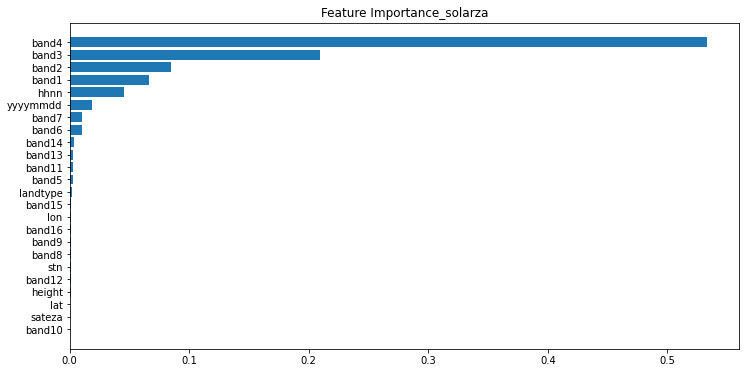

C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:5.51457
[1]	validation_0-rmse:5.47045
[2]	validation_0-rmse:5.42678
[3]	validation_0-rmse:5.38482
[4]	validation_0-rmse:5.34214
[5]	validation_0-rmse:5.29998
[6]	validation_0-rmse:5.25953
[7]	validation_0-rmse:5.21235
[8]	validation_0-rmse:5.17179
[9]	validation_0-rmse:5.12539
[10]	validation_0-rmse:5.08579
[11]	validation_0-rmse:5.04758
[12]	validation_0-rmse:5.00886
[13]	validation_0-rmse:4.97154
[14]	validation_0-rmse:4.93465
[15]	validation_0-rmse:4.89439
[16]	validation_0-rmse:4.85739
[17]	validation_0-rmse:4.82086
[18]	validation_0-rmse:4.78562
[19]	validation_0-rmse:4.75094
[20]	validation_0-rmse:4.71642
[21]	validation_0-rmse:4.68251
[22]	validation_0-rmse:4.64819
[23]	validation_0-rmse:4.61502
[24]	validation_0-rmse:4.58237
[25]	validation_0-rmse:4.54923
[26]	validation_0-rmse:4.51654
[27]	validation_0-rmse:4.48425
[28]	validation_0-rmse:4.45237
[29]	validation_0-rmse:4.42148
[30]	validation_0-rmse:4.39123
[31]	validation_0-rmse:4.36041
[32]	validation_0-

[260]	validation_0-rmse:2.29912
[261]	validation_0-rmse:2.29860
[262]	validation_0-rmse:2.29811
[263]	validation_0-rmse:2.29781
[264]	validation_0-rmse:2.29731
[265]	validation_0-rmse:2.29684
[266]	validation_0-rmse:2.29592
[267]	validation_0-rmse:2.29553
[268]	validation_0-rmse:2.29533
[269]	validation_0-rmse:2.29492
[270]	validation_0-rmse:2.29438
[271]	validation_0-rmse:2.29399
[272]	validation_0-rmse:2.29354
[273]	validation_0-rmse:2.29317
[274]	validation_0-rmse:2.29168
[275]	validation_0-rmse:2.29152
[276]	validation_0-rmse:2.29006
[277]	validation_0-rmse:2.28990
[278]	validation_0-rmse:2.28848
[279]	validation_0-rmse:2.28839
[280]	validation_0-rmse:2.28814
[281]	validation_0-rmse:2.28675
[282]	validation_0-rmse:2.28540
[283]	validation_0-rmse:2.28516
[284]	validation_0-rmse:2.28385
[285]	validation_0-rmse:2.28361
[286]	validation_0-rmse:2.28339
[287]	validation_0-rmse:2.28314
[288]	validation_0-rmse:2.28314
[289]	validation_0-rmse:2.28190
[290]	validation_0-rmse:2.28166
[291]	va

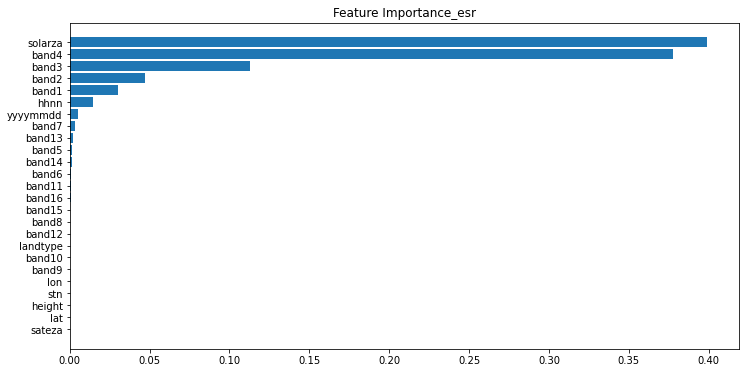

NameError: name 'prediction_esr' is not defined

In [11]:
# def model_train(curr_dir):
 
#     path_train = os.path.join(curr_dir+"\\data_rota\\"+"\\train")
#     path_test = os.path.join(curr_dir+"\\data_rota\\"+"\\test")
    
#     folders_tr = os.listdir(path_train)
#     folders_test = os.listdir(path_test)
    
#     train = pd.DataFrame()
#     for files in folders_tr:
#         df= pd.read_csv(os.path.join(curr_dir+"\\data_rota\\"+"\\train\\")+files)
#         train = pd.concat([train, df])            
              
    
#     test = pd.DataFrame()
#     for files in folders_test:
#         df= pd.read_csv(os.path.join(curr_dir+"\\data_rota\\"+"\\test\\")+files)
#         test = pd.concat([test, df])   


#     X_train = train[['band1','band2', 'band3', 'band4','band6', 'band7','band11', 'band12', \
#                      'band13', 'band14', 'band15', 'band16','solarza','esr']]
#     X_val = val[['band1','band2', 'band3', 'band4','band6', 'band7','band11', 'band12', \
#                      'band13', 'band14', 'band15', 'band16','solarza','esr']]    
#     X_test = test[['band1','band2', 'band3', 'band4','band6', 'band7','band11', 'band12', \
#                      'band13', 'band14', 'band15', 'band16','solarza','esr']]
 
# X_train = train.drop('uv',axis=1)
# X_val = val.drop('uv',axis=1)
# X_test = test.drop('uv',axis=1)
    
# y_train = train[['uv']].values
# y_val = val[['uv']].values





# X_train_solarza = train.drop(columns = ['solarza'])
# X_test_solarza = test.drop(columns = ['solarza'])
    
# X_train_esr = train.drop(columns = ['esr'])
# X_test_esr = test.drop(columns = ['esr'])

# X_train_uv = train.drop(columns = ['uv'])
# X_test_uv = test.drop(columns = ['uv'])
    
# y_train_solarza=train[['solarza']].values
# y_test_solarza=test[['solarza']].values
    
# y_train_esr=train[['esr']].values
# y_test_esr=test[['esr']].values



# train_solarza
X_train_solarza = train.drop(columns = ['solarza','esr','uv'])       
X_val_solarza = val.drop(columns = ['solarza','esr','uv'])
X_test_solarza = test.drop(columns = ['solarza','esr','uv'])

y_train_solarza=train[['solarza']].values
y_val_solarza=val[['solarza']].values


xgb_model1 = xgb.XGBRegressor(n_estimators = 2000, learning_rate = 0.01, max_depth=11, subsample=0.5,colsample_bytree=0.7, random_state = 2000)
xgb_model1.fit(X_train_solarza,y_train_solarza, eval_set=[(X_val_solarza, y_val_solarza)], early_stopping_rounds=15)
    
    
feature_importance = xgb_model1.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_val_solarza.columns)[sorted_idx])
plt.title('Feature Importance_solarza')
plt.show()


# 예측한 solarza를 train set과 검증 셋에 동시에 넣어야 함.
prediction_train = xgb_model1.predict(X_train_solarza)
X_train_solarza['solarza'] = prediction_train
    
prediction_val = xgb_model1.predict(X_val_solarza)
X_val_solarza['solarza'] = prediction_val

prediction = xgb_model1.predict(X_test_solarza)
X_test_solarza['solarza'] = prediction



# prediction_train = xgb_model3.predict(X_train_uv)
# X_train_uv['uv'] = prediction_esr
    
# prediction_val = xgb_model3.predict(X_val_uv)
# X_val_uv['uv'] = prediction_val

# prediction = xgb_model3.predict(X_test_uv)
# # X_test_uv['uv'] = prediction
# submission


#     trainx = train[['band1','band2', 'band3', 'band4','band6', 'band7','band11', 'band12', \
#                      'band13', 'band14', 'band15', 'band16','solarza','esr']]
#     test1 = test[['band1','band2', 'band3', 'band4','band6', 'band7','band11', 'band12', \
#                      'band13', 'band14', 'band15', 'band16','solarza','esr']]
    
#     trainy = train[['uv']].values

#     X_train, X_val, y_train, y_val = train_test_split(trainx, trainy, test_size=0.3, shuffle=False)
    
#     param_grid = {
#     'n_estimators': [100, 150, 200, 250],
#     'max_depth': [None, 6, 9, 12],
#     'min_samples_split': [0.01, 0.05, 0.1],
#     'max_features': ['auto', 'sqrt']}
    
    
#     kf = KFold(random_state=30,
#            n_splits=3,
#            shuffle=True,
#           )
    
#     model_name = '\\save\\'+'best_model_v1.h5' 

#     filepath = os.path.join(os.getcwd()+ model_name)

#     es = EarlyStopping(monitor='val_mse', verbose=1, patience=20)

#     checkpoint = ModelCheckpoint(filepath=filepath,
#                              monitor='val_mse',
#                              verbose=1,
#                              save_best_only=True)

#     callbacks = [checkpoint, es]



# xgb_model = xgb.XGBRegressor(n_estimators = 2000, learning_rate = 0.01, max_depth=11, subsample=0.5,colsample_bytree=0.7, random_state = 2000)

# xgb_model.fit(X_train,y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=15)



# lgbm_reg = LGBMRegressor(objective= "regression",
#                      max_depth= max_depth,
#                      n_estimators= n_estimators,
#                      learning_rate= lr,
#                      num_leaves = num_leaves)
    
# lgbm_reg.fit(X_train, y_train,
#           eval_set=[(X_val, y_val)],
#           eval_metric=["mse"],
#           early_stopping_rounds=early_stopping_rounds,
#           verbose=verbose) 



#     estimator = xgb.XGBRegressor()
    # define grid_search
#     grid_search = GridSearchCV(estimator=estimator, 
#                                param_grid=param_grid, 
#                                cv=kf, 
#                                n_jobs=-1, 
#                                verbose=2
#                               )

    # fit with (x_train, y_train)
#     grid_search.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=1)
    
#     feature_importance = xgb_model.feature_importances_
#     sorted_idx = np.argsort(feature_importance)
#     fig = plt.figure(figsize=(12, 6))
#     plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
#     plt.yticks(range(len(sorted_idx)), np.array(X_val.columns)[sorted_idx])
#     plt.title('Feature Importance')
    
#     pred = xgb_model.predict(test1)
#     submission=pd.read_csv('1-1_검증데이터셋.csv', encoding='utf-8')
#     submission1=submission.copy()
#     submission1['UV'] = pred
    
#     submission1.to_csv("220224_xgb_uv.csv", index = False)

C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:5.51457
[1]	validation_0-rmse:5.47045
[2]	validation_0-rmse:5.42678
[3]	validation_0-rmse:5.38482
[4]	validation_0-rmse:5.34214
[5]	validation_0-rmse:5.29998
[6]	validation_0-rmse:5.25953
[7]	validation_0-rmse:5.21235
[8]	validation_0-rmse:5.17179
[9]	validation_0-rmse:5.12539
[10]	validation_0-rmse:5.08579
[11]	validation_0-rmse:5.04758
[12]	validation_0-rmse:5.00886
[13]	validation_0-rmse:4.97154
[14]	validation_0-rmse:4.93465
[15]	validation_0-rmse:4.89439
[16]	validation_0-rmse:4.85739
[17]	validation_0-rmse:4.82086
[18]	validation_0-rmse:4.78562
[19]	validation_0-rmse:4.75094
[20]	validation_0-rmse:4.71642
[21]	validation_0-rmse:4.68251
[22]	validation_0-rmse:4.64819
[23]	validation_0-rmse:4.61502
[24]	validation_0-rmse:4.58237
[25]	validation_0-rmse:4.54923
[26]	validation_0-rmse:4.51654
[27]	validation_0-rmse:4.48425
[28]	validation_0-rmse:4.45237
[29]	validation_0-rmse:4.42148
[30]	validation_0-rmse:4.39123
[31]	validation_0-rmse:4.36041
[32]	validation_0-

[260]	validation_0-rmse:2.29912
[261]	validation_0-rmse:2.29860
[262]	validation_0-rmse:2.29811
[263]	validation_0-rmse:2.29781
[264]	validation_0-rmse:2.29731
[265]	validation_0-rmse:2.29684
[266]	validation_0-rmse:2.29592
[267]	validation_0-rmse:2.29553
[268]	validation_0-rmse:2.29533
[269]	validation_0-rmse:2.29492
[270]	validation_0-rmse:2.29438
[271]	validation_0-rmse:2.29399
[272]	validation_0-rmse:2.29354
[273]	validation_0-rmse:2.29317
[274]	validation_0-rmse:2.29168
[275]	validation_0-rmse:2.29152
[276]	validation_0-rmse:2.29006
[277]	validation_0-rmse:2.28990
[278]	validation_0-rmse:2.28848
[279]	validation_0-rmse:2.28839
[280]	validation_0-rmse:2.28814
[281]	validation_0-rmse:2.28675
[282]	validation_0-rmse:2.28540
[283]	validation_0-rmse:2.28516
[284]	validation_0-rmse:2.28385
[285]	validation_0-rmse:2.28361
[286]	validation_0-rmse:2.28339
[287]	validation_0-rmse:2.28314
[288]	validation_0-rmse:2.28314
[289]	validation_0-rmse:2.28190
[290]	validation_0-rmse:2.28166
[291]	va

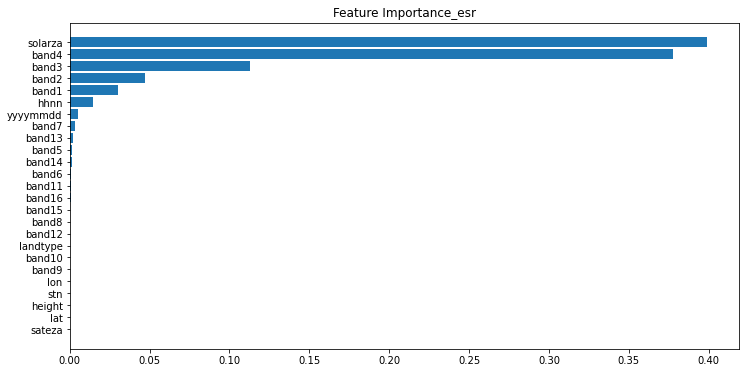

In [14]:
# train_esr
X_train_esr = X_train_solarza
X_val_esr = X_val_solarza
X_test_esr = X_test_solarza
    
y_train_esr=train[['esr']].values
y_val_esr=val[['esr']].values
    
xgb_model2 = xgb.XGBRegressor(n_estimators = 2000, learning_rate = 0.01, max_depth=11, subsample=0.5,colsample_bytree=0.7, random_state = 2000)
xgb_model2.fit(X_train_esr,y_train_esr, eval_set=[(X_val_esr, y_val_esr)], early_stopping_rounds=15)
    
    
feature_importance = xgb_model2.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_val_esr.columns)[sorted_idx])
plt.title('Feature Importance_esr')
plt.show()

# 예측한 esr를 train set과 검증 셋에 동시에 넣어야 함.
prediction_train2 = xgb_model2.predict(X_train_esr)
X_train_esr['esr'] = prediction_train2
    
prediction_val2 = xgb_model2.predict(X_val_esr)
X_val_esr['esr'] = prediction_val2

prediction2 = xgb_model2.predict(X_test_esr)
X_test_esr['esr'] = prediction2

C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.71950
[1]	validation_0-rmse:1.69777
[2]	validation_0-rmse:1.67621
[3]	validation_0-rmse:1.65503
[4]	validation_0-rmse:1.63407
[5]	validation_0-rmse:1.61344
[6]	validation_0-rmse:1.59312
[7]	validation_0-rmse:1.57324
[8]	validation_0-rmse:1.55369
[9]	validation_0-rmse:1.53449
[10]	validation_0-rmse:1.51555
[11]	validation_0-rmse:1.49671
[12]	validation_0-rmse:1.47848
[13]	validation_0-rmse:1.45998
[14]	validation_0-rmse:1.44096
[15]	validation_0-rmse:1.42412
[16]	validation_0-rmse:1.40672
[17]	validation_0-rmse:1.38970
[18]	validation_0-rmse:1.37327
[19]	validation_0-rmse:1.35604
[20]	validation_0-rmse:1.34007
[21]	validation_0-rmse:1.32429
[22]	validation_0-rmse:1.30886
[23]	validation_0-rmse:1.29359
[24]	validation_0-rmse:1.27877
[25]	validation_0-rmse:1.26418
[26]	validation_0-rmse:1.24994
[27]	validation_0-rmse:1.23607
[28]	validation_0-rmse:1.22226
[29]	validation_0-rmse:1.20889
[30]	validation_0-rmse:1.19573
[31]	validation_0-rmse:1.18294
[32]	validation_0-

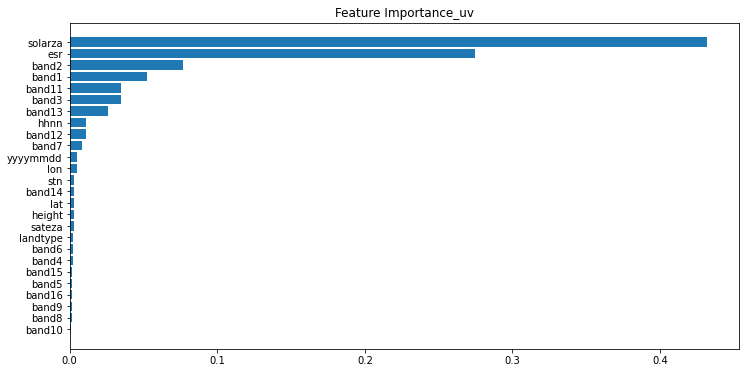

In [15]:
# train_uv
X_train_uv = X_train_esr     # 앞서 추가된 열도 포함된 변수들
X_val_uv = X_val_esr
X_test_uv = X_test_esr
    
y_train_uv=train[['uv']].values
y_val_uv=val[['uv']].values
    
xgb_model3 = xgb.XGBRegressor(n_estimators = 2000, learning_rate = 0.01, max_depth=11, subsample=0.5,colsample_bytree=0.7, random_state = 2000)
xgb_model3.fit(X_train_uv,y_train_uv, eval_set=[(X_val_uv, y_val_uv)], early_stopping_rounds=15)
    
    
feature_importance = xgb_model3.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_val_uv.columns)[sorted_idx])
plt.title('Feature Importance_uv')
plt.show()

In [ ]:
# feature_importance = xgb_model.feature_importances_
# sorted_idx = np.argsort(feature_importance)
# fig = plt.figure(figsize=(12, 6))
# plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
# plt.yticks(range(len(sorted_idx)), np.array(X_val.columns)[sorted_idx])
# plt.title('Feature Importance')

In [16]:
pred = xgb_model3.predict(X_test_uv)
submission=pd.read_csv('1-1_검증데이터셋.csv', encoding='utf-8')
submission1=submission.copy()
submission1['UV'] = pred
submission1
# submission1.to_csv("220224_xgb_uv_nooutlier_transs.csv", index = False)

,YearMonthDayHourMinute,STN,UV
0,202206010000,13,0.215040
1,202206010000,105,0.214992
2,202206010000,108,0.214992
3,202206010000,112,0.214992
4,202206010000,115,0.214992
...,...,...,...
51850,202206250000,146,0.262330
51851,202206250000,152,0.215139
51852,202206250000,156,0.215139
51853,202206250000,159,0.215139


In [17]:
submission1 # 완전 낮게 되는군.. 첨에 outlier 다 포함했을 때 했는 결과와 비슷.. 이건 너무 빗나간 것 같음.

,YearMonthDayHourMinute,STN,UV
0,202206010000,13,0.215040
1,202206010000,105,0.214992
2,202206010000,108,0.214992
3,202206010000,112,0.214992
4,202206010000,115,0.214992
...,...,...,...
51850,202206250000,146,0.262330
51851,202206250000,152,0.215139
51852,202206250000,156,0.215139
51853,202206250000,159,0.215139


In [18]:
submission1['UV'].value_counts()      # 정렬해서 보기

0.214992    12384
0.215139     5538
0.215040     1418
0.260822      160
0.261207      136
            ...  
0.328519        1
0.287790        1
0.271517        1
0.391147        1
0.262330        1
Name: UV, Length: 31122, dtype: int64

<AxesSubplot:>

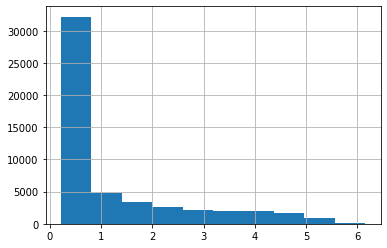

In [19]:
submission1['UV'].hist()      

In [20]:
submission1[submission1['UV']>7]

,YearMonthDayHourMinute,STN,UV


In [21]:
submission1[submission1['UV']<7]

,YearMonthDayHourMinute,STN,UV
0,202206010000,13,0.215040
1,202206010000,105,0.214992
2,202206010000,108,0.214992
3,202206010000,112,0.214992
4,202206010000,115,0.214992
...,...,...,...
51850,202206250000,146,0.262330
51851,202206250000,152,0.215139
51852,202206250000,156,0.215139
51853,202206250000,159,0.215139


In [ ]:
# 관측소별로 자외선 지수 분석할지.